In [1]:
import numpy as np
import colormatch
import matplotlib.pyplot as plt
from scipy import interpolate
%matplotlib inline

In [2]:

def _loadcie():
    wvl,xx,yy,zz = np.loadtxt("cmf.csv",unpack=True,delimiter=',')
    return wvl,xx,yy,zz

In [3]:

def xyz2rgb(x,y,normalization):
    
    z = 1-(x+y)
    
    r = np.sum(widegamut[0,:]*x)*normalization
    g = np.sum(widegamut[1,:]*y)*normalization
    b = np.sum(widegamut[2,:]*z)*normalization
    cmax = np.amax((r,g,b))
    
    #return r/cmax,g/cmax,b/cmax
    return r,g,b


In [4]:
def makexyz(wvl,spec):
    if np.amin(wvl)<1.0e-3: #probably meters not nanometers
        wvl*=1.0e9
    w0,xx,yy,zz = _loadcie()
    imin = np.where(wvl>np.amin(w0))[0][0]
    imax = np.where(wvl<np.amax(w0))[0][-1]
    wn = wvl[imin:imax+1]
    specn = spec[imin:imax+1]
    fx = interpolate.interp1d(w0,xx)
    fy = interpolate.interp1d(w0,yy)
    fz = interpolate.interp1d(w0,zz)
    
    xn = fx(wn)
    yn = fy(wn)
    zn = fz(wn)
    
    plt.plot(wn,xn)
    plt.plot(wn,yn)
    plt.plot(wn,zn)
    
    XI = np.trapz(xn*specn,x=wn)
    YI = np.trapz(yn*specn,x=wn)
    ZI = np.trapz(zn*specn,x=wn)
    #if (XI+YI+ZI)>0:
    #    xnu = XI/(XI+YI+ZI)
    #    ynu = YI/(XI+YI+ZI)
    #    znu = 1.0-(xnu+ynu)
    #else:
    #    xnu=0
    #    ynu=0
    #    znu=0
    
    return XI,YI,ZI

In [5]:
h = 6.62607004e-34
c = 2.99792458e8
kb = 1.38064852e-23

In [6]:
def blackbody(temp):
    wv = np.logspace(-8,-4,num=1000)
    planck = 2*h*c**2/wv**5 * 1.0/(np.exp(h*c/(wv*kb*temp))-1)
    return wv,planck

In [7]:
w,gstar = blackbody(5700.0)

(1e-15, 100000000000000.0)

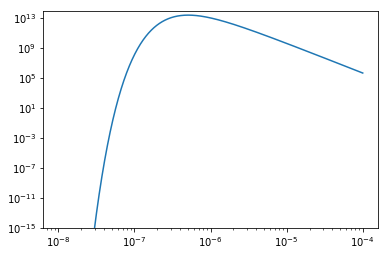

In [8]:
plt.plot(w,gstar)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1.0e-15,1.0e14)

In [9]:
w,mstar = blackbody(3000.0)

In [10]:
w,bstar = blackbody(8000.0)

(3.9e-07, 8.3e-07)

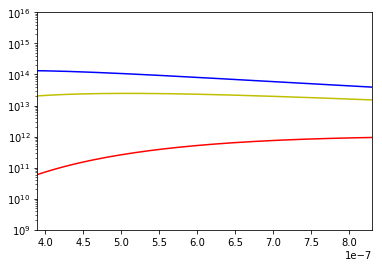

In [11]:
plt.plot(w,mstar,color='r')
plt.plot(w,gstar,color='y')
plt.plot(w,bstar,color='b')
#plt.xscale('log')
plt.yscale('log')
plt.ylim(1.0e9,1.0e16)
plt.xlim(3.90e-7,8.30e-7)

In [12]:
r1,g1,b1 = colormatch.spec2rgb(w,mstar,normalization=1.2)
r2,g2,b2 = colormatch.spec2rgb(w,gstar,normalization=1.2)
r3,g3,b3 = colormatch.spec2rgb(w,bstar,normalization=1.2)

0.5327352032341939 0.4790831058715296 0.22960519571719476
0.39653144820227 0.4025137278282032 0.4904779779619034
0.355337547676846 0.36564788566128725 0.5863049732123579


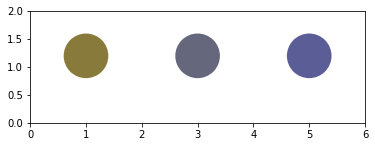

In [13]:

print r1,g1,b1
print r2,g2,b2
print r3,g3,b3
fig, ax = plt.subplots()
from matplotlib.patches import Circle
circle1 = Circle(xy=(1, 1*1.2), radius=0.4, fc=(r1,g1,b1))
circle2 = Circle(xy=(3, 1*1.2), radius=0.4, fc=(r2,g2,b2))
circle3 = Circle(xy=(5, 1*1.2), radius=0.4, fc=(r3,g3,b3))
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)
#ax.annotate('{:4d} K'.format(T), xy=(x, y*1.2-0.5), va='center',
            #ha='center', color=(r1,g1,b1))

# Set the limits and background colour; remove the ticks
ax.set_xlim(0,6)
ax.set_ylim(0,2)
#ax.set_xticks([])
#ax.set_yticks([])
#ax.set_axis_bgcolor('k')
# Make sure our circles are circular!
ax.set_aspect("equal")

/home/adiv/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/home/adiv/.local/lib/python2.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  if __name__ == '__main__':


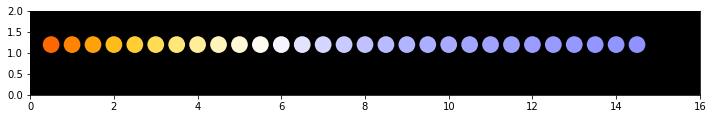

In [14]:
fig,ax = plt.subplots(figsize=(12,4))
for t in range(500,15000,500):
    w,s = blackbody(t)
    r,g,b = colormatch.spec2rgb(w,s*w,normalization=1.0)
    cmax = np.amax((r,g,b))
    ax.add_patch(Circle(xy=((t)/1000.0,1.2),radius=0.2,fc=(r/cmax,g/cmax,b/cmax)))
ax.set_xlim(0,16)
ax.set_ylim(0,2)
ax.set_axis_bgcolor('k')
ax.set_aspect("equal")

In [15]:
import netCDF4 as nc

In [16]:
planet = nc.Dataset("lmdz_c1.0_phasecurve.nc","r")
planetnc =nc.Dataset("lmdz_c1.0nc_phasecurve.nc","r")
gsol = nc.Dataset("gsol_phasecurve.nc","r")

In [17]:
for k in gsol.variables:
    print k, gsol.variables[k].shape,gsol.variables[k].dimensions

phase (64,) (u'phi',)
wvl (884,) (u'wavelength',)
spectra (64, 884) (u'phi', u'wavelength')
map (64, 47, 64, 884) (u'phi', u'latitude', u'longitude', u'wavelength')


In [18]:
mm = gsol.variables['map'][32,:,:,:]
intens = np.zeros((47,64,3))
colors = np.zeros((47,64,3))

wvl = gsol.variables['wvl'][:]*1000.0

In [19]:
wvl[0]

550.0002

In [20]:
for j in range(0,47):
    for k in range(0,64):
        intens[j,k,:] = colormatch.makexyz(wvl,mm[j,k,:])
norms = intens[:,:,2]/np.amax(intens[:,:,2])

In [21]:
for j in range(0,47):
    for k in range(0,64):
        colors[j,k,:] = colormatch.xyz2rgb(intens[j,k,0],intens[j,k,1],intens[j,k,2]*norms[j,k])
cmax=1.0*np.amax(colors)
colors/=cmax

([], <a list of 0 Text yticklabel objects>)

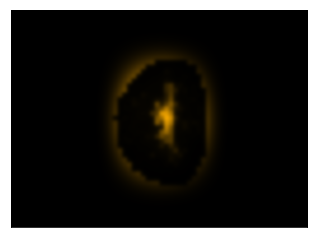

In [22]:
plt.imshow(np.minimum(colors,1.0),interpolation='gaussian')
plt.xticks([])
plt.yticks([])